In [16]:
import pandas as pd
import numpy as np
import pandasql as ps 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [17]:
df = pd.read_csv('Food Waste data and research - by country.csv')
df = df.dropna()

In [18]:
df.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


In [26]:
#Predict The Household estimate (tonns/year) based on other available featues

In [48]:
le_region = LabelEncoder()
df['Region_enc'] = le_region.fit_transform(df['Region'])

In [49]:
X = df[['combined figures (kg/capita/year)', 'Retail estimate (kg/capita/year)', 
        'Food service estimate (kg/capita/year)', 'Region_enc']]

In [50]:
y = df['Household estimate (tonnes/year)']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [52]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [53]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"RMSE: {rmse:.2f}")

RMSE: 7485029.76


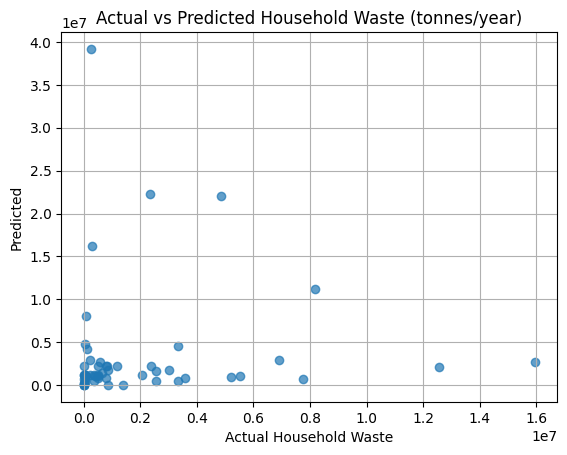

In [54]:
import matplotlib.pyplot as plt
plt.scatter(y_test, preds, alpha=0.7)
plt.xlabel("Actual Household Waste")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Household Waste (tonnes/year)")
plt.grid(True)
plt.show()

In [55]:
#2 Classify Countries as High or Low Houshold Waste Producers

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
median_waste = df['Household estimate (tonnes/year)'].median()
df['High_Waste'] = (df['Household estimate (tonnes/year)']> median_waste)

In [68]:
le_region = LabelEncoder()
df['Region_enc'] = le_region.fit_transform(df['Region'])

In [69]:
features = ['combined figures (kg/capita/year)', 'Retail estimate (kg/capita/year)',
           'Food service estimate (kg/capita/year)', 'Region_enc']

In [70]:
X = df[features]
y = df['High_Waste']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [72]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [73]:
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

       False       0.59      0.36      0.44        28
        True       0.51      0.73      0.60        26

    accuracy                           0.54        54
   macro avg       0.55      0.54      0.52        54
weighted avg       0.55      0.54      0.52        54

Confusion Matrix:
 [[10 18]
 [ 7 19]]


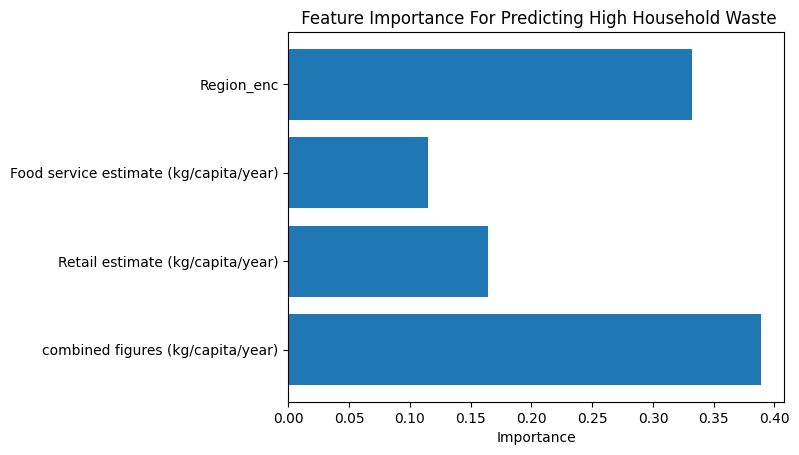

In [74]:
feat_imp = clf.feature_importances_
plt.barh(features, feat_imp)
plt.xlabel("Importance")
plt.title(" Feature Importance For Predicting High Household Waste")
plt.show()